# Logistic Regression

*CS 334 - Algorithms of Machine Learning | Conrad Kennington*

*Computer Science | Boise State University*

*14.09.2022 | Fall 2022*

*Aida Gomezbueno Berezo | aidagomezbuenobe@u.boisestate.edu*

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Find some data

In [3]:
data = pd.read_csv(r'boise-weather-forecast-dataset.csv')
df = pd.DataFrame(data, columns=['name','datetime','tempmax','tempmin','temp','feelslikemax','feelslikemin','feelslike','dew','humidity','precip','precipprob','precipcover','preciptype','snow','snowdepth','windgust','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex','severerisk','sunrise','sunset','moonphase','conditions','description','icon','stations', 'label'])
df.columns=['Name', 'Datetime', 'TempMax', 'TempMin', 'Temp', 'Feelslikemax', 'Feelslikemin' , 'Feelslike' , 'Dew' , 'Humidity' , 'Precip' , 'PrecipProb', 'PrecipCover', 'PrecipType', 'Snow' , 'SnowDepth', 'WindGust', 'WindSpeed' , 'WindDir', 'SeaLevelPressure', 'CloudCover', 'Visibility', 'SolarRadiation', 'SolarEnergy', 'UVIndex', 'SevereRisk', 'Sunrise', 'Sunset' , 'MoonPhase', 'Conditions', 'Description', 'Icon', 'Stations', 'Label']
df = df.dropna(axis='columns')
df

,Name,Datetime,TempMax,TempMin,Temp,Feelslikemax,Feelslikemin,Feelslike,Dew,Humidity,...,SolarEnergy,UVIndex,Sunrise,Sunset,MoonPhase,Conditions,Description,Icon,Stations,Label
0,Boise,8/1/21,27.2,20.6,23.3,28.2,20.6,23.5,18.9,77.7,...,11.9,8,2021-08-01T06:34:26,2021-08-01T21:07:05,0.80,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"KBOI,KEUL,72681524106,BOII,TS587,72681394195,7...",1
1,Boise,8/2/21,33.4,20.6,26.6,32.1,20.6,26.3,16.4,58.7,...,26.0,9,2021-08-02T06:35:30,2021-08-02T21:05:52,0.84,Clear,Clear conditions throughout the day.,clear-day,"KBOI,KEUL,72681524106,BOII,TS587,LLAI1,7268139...",0
2,Boise,8/3/21,35.0,20.6,27.7,33.3,20.6,27.1,12.8,43.1,...,23.4,9,2021-08-03T06:36:35,2021-08-03T21:04:36,0.89,Rain,Clear conditions throughout the day with early...,rain,"KBOI,KEUL,72681524106,BOII,TS587,LLAI1,7268139...",1
3,Boise,8/4/21,39.9,19.9,29.7,37.3,19.9,28.6,8.9,30.8,...,24.1,9,2021-08-04T06:37:40,2021-08-04T21:03:19,0.93,Clear,Clear conditions throughout the day.,clear-day,"KBOI,KEUL,72681524106,BOII,TS587,72681394195,7...",0
4,Boise,8/5/21,35.6,22.8,29.4,33.4,22.8,28.3,9.0,29.3,...,20.3,9,2021-08-05T06:38:46,2021-08-05T21:02:01,0.96,Clear,Clear conditions throughout the day.,clear-day,"KBOI,KEUL,72681524106,BOII,TS587,LLAI1,7268139...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Boise,7/28/22,39.3,21.7,31.1,36.9,21.7,29.8,8.9,27.5,...,29.4,10,2022-07-28T06:29:58,2022-07-28T21:12:02,1.00,Clear,Clear conditions throughout the day.,clear-day,"KBOI,KEUL,72681524106,BOII,72681394195,7268102...",0
362,Boise,7/29/22,40.0,21.1,31.2,37.0,21.1,29.7,6.6,24.0,...,29.2,10,2022-07-29T06:31:01,2022-07-29T21:10:55,0.00,Clear,Clear conditions throughout the day.,clear-day,"KBOI,KEUL,72681524106,BOII,72681394195,7268102...",0
363,Boise,7/30/22,39.4,21.6,31.4,36.2,21.6,29.8,4.5,21.2,...,32.2,10,2022-07-30T06:32:04,2022-07-30T21:09:46,0.01,Clear,Clear conditions throughout the day.,clear-day,"KBOI,KEUL,72681524106,BOII,TT289,72681394195,7...",0
364,Boise,7/31/22,41.1,23.7,32.2,37.8,23.7,30.5,3.1,17.8,...,27.8,9,2022-07-31T06:33:07,2022-07-31T21:08:36,0.04,Clear,Clear conditions throughout the day.,clear-day,"KBOI,KEUL,72681524106,TT289,72681394195,726810...",0


In [4]:
df.isna().sum()

Name                0
Datetime            0
TempMax             0
TempMin             0
Temp                0
Feelslikemax        0
Feelslikemin        0
Feelslike           0
Dew                 0
Humidity            0
Precip              0
PrecipProb          0
PrecipCover         0
Snow                0
SnowDepth           0
WindSpeed           0
WindDir             0
SeaLevelPressure    0
CloudCover          0
Visibility          0
SolarRadiation      0
SolarEnergy         0
UVIndex             0
Sunrise             0
Sunset              0
MoonPhase           0
Conditions          0
Description         0
Icon                0
Stations            0
Label               0
dtype: int64

In [5]:
feature_cols = ['Temp', 'Humidity', 'Feelslike', 'Precip', 'PrecipCover', 'PrecipProb', 'UVIndex']
X = df[feature_cols]
Y = df.Label
X2 = df.Humidity.values.reshape(-1,1)

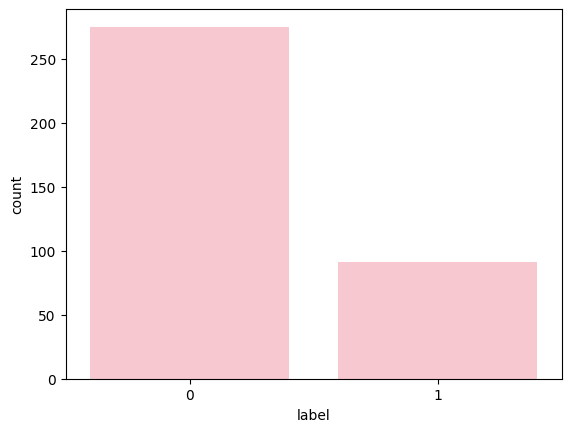

In [6]:
axes_subplot = sns.countplot(x="label", data=data, color="pink")

## Use Logistic Regression

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=25)
logreg = LogisticRegression(max_iter=5000, C=1e9)
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)

[]

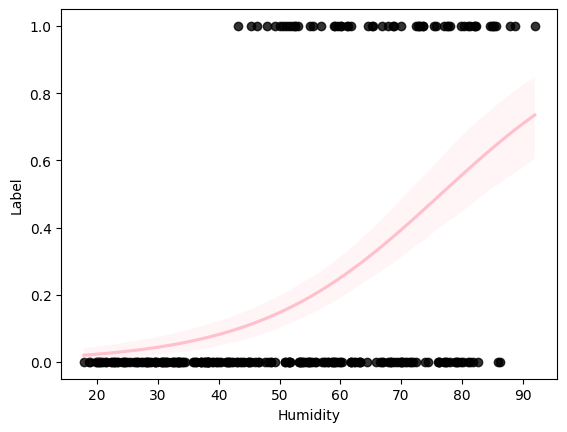

In [8]:
sns.regplot(x=X_train.Humidity, y=Y_train, data=X_train, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

*We can conclude that, as logic tells us and the study confirms, the higher the humidity percentages, the higher the probability of rainfall.*

In [9]:
X_train_H,X_test_H,Y_train_H,Y_test_H=train_test_split(X2, Y, test_size=0.3, random_state=25)
logreg = LogisticRegression(max_iter=5000, C=1e9)
logreg.fit(X_train_H,Y_train_H)
Y_pred_H = logreg.predict(X_test_H)

[]

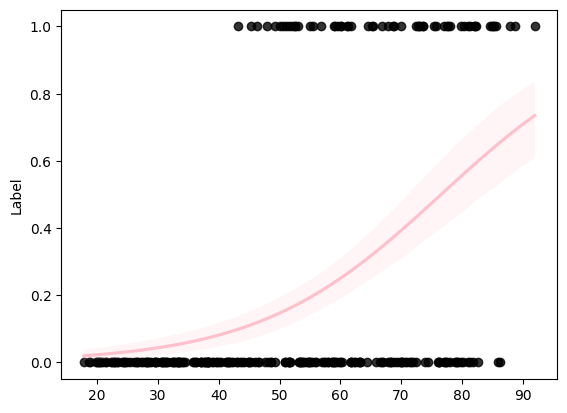

In [10]:
sns.regplot(x=X_train_H, y=Y_train_H, data=X_train_H, logistic = True, scatter_kws={"color": "black"}, line_kws={"color": "pink"})
plt.plot()

## How good is your model?

In [11]:
#Model 1 taking into account all the parameters related or that influence or may have an impact on the prediction.
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
#print("Score:", logreg.score(X_test, Y_test))

Accuracy: 1.0


In [12]:
#Model 2, limiting only to humidity.
print("Accuracy:", metrics.accuracy_score(Y_test_H, Y_pred_H))
print("Score:", logreg.score(X_test_H, Y_test_H))

Accuracy: 0.7454545454545455
Score: 0.7454545454545455


*Accuracy levels are low. One idea would be to use the methods mentioned in class to increase the accuracy percentage by providing the model with more "varied" training data. Perhaps the algorithm has decided to omit the winter stage (a stage that is considerably important for predicting the probability of rain tomorrow). Some of these techniques are: K-folds Validation, Stratified K-fold Cross-Validation, Leave One Out Cross-Validation, or Repeated Random Test-Train Splits.*